In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('train_0irEZ2H.csv')
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [3]:
test = pd.read_csv('test_nfaJ3J5.csv')
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
train['week'].unique()

array(['17/01/11', '24/01/11', '31/01/11', '07/02/11', '14/02/11',
       '21/02/11', '28/02/11', '07/03/11', '14/03/11', '21/03/11',
       '28/03/11', '04/04/11', '11/04/11', '18/04/11', '25/04/11',
       '02/05/11', '09/05/11', '16/05/11', '23/05/11', '30/05/11',
       '06/06/11', '13/06/11', '20/06/11', '27/06/11', '04/07/11',
       '11/07/11', '18/07/11', '25/07/11', '01/08/11', '08/08/11',
       '15/08/11', '22/08/11', '29/08/11', '05/09/11', '12/09/11',
       '19/09/11', '26/09/11', '03/10/11', '10/10/11', '17/10/11',
       '24/10/11', '31/10/11', '07/11/11', '14/11/11', '21/11/11',
       '28/11/11', '05/12/11', '12/12/11', '19/12/11', '26/12/11',
       '02/01/12', '09/01/12', '16/01/12', '23/01/12', '30/01/12',
       '06/02/12', '13/02/12', '20/02/12', '27/02/12', '06/03/12',
       '13/03/12', '20/03/12', '27/03/12', '03/04/12', '10/04/12',
       '17/04/12', '24/04/12', '01/05/12', '08/05/12', '15/05/12',
       '22/05/12', '29/05/12', '05/06/12', '12/06/12', '19/06/

In [18]:
train['week'] = train['week'].astype('datetime64')  # chaging the data type from int64 to datetime64

In [ ]:
train['week'].min(),train['week'].max()   # getting min and max date of the dataset

In [7]:
# extracting separate week,day,year,week of year, day of week
train['year']=pd.DatetimeIndex(train['week']).year
train['month']=pd.DatetimeIndex(train['week']).month
train['day']=pd.DatetimeIndex(train['week']).day
train['week_of_year'] = [date.weekofyear for date in train.week] 
train['day_of_week'] = [date.dayofweek for date in train.week]

In [8]:
train['month'].unique()

array([ 1,  7,  2,  3,  4, 11,  9,  5,  6,  8, 12, 10], dtype=int64)

In [19]:
train.head()

,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day
0,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,17
1,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,17
2,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,17
3,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,17
4,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,17


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   week             150150 non-null  datetime64[ns]
 1   store_id         150150 non-null  int64         
 2   sku_id           150150 non-null  int64         
 3   total_price      150149 non-null  float64       
 4   base_price       150150 non-null  float64       
 5   is_featured_sku  150150 non-null  int64         
 6   is_display_sku   150150 non-null  int64         
 7   units_sold       150150 non-null  int64         
 8   year             150150 non-null  int64         
 9   month            150150 non-null  int64         
 10  day              150150 non-null  int64         
 11  week_of_year     150150 non-null  int64         
 12  day_of_week      150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(10)
memory usage: 14.9 MB


In [24]:
train.drop('week',axis=1,inplace=True)

In [25]:
train.isnull().sum()

store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
year               0
month              0
day                0
week_of_year       0
day_of_week        0
dtype: int64

In [ ]:
train['total_price']=train['total_price'].fillna(train['total_price'].median())   #filling the missing value by median

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [14]:
test.drop('record_ID',axis=1,inplace=True)

In [15]:
test.isnull().sum()

week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [26]:
test['week'] = test['week'].astype('datetime64')

In [94]:
test.drop('week',axis=1,inplace=True)

In [29]:
test['year']=pd.DatetimeIndex(test['week']).year
test['month']=pd.DatetimeIndex(test['week']).month
test['day']=pd.DatetimeIndex(test['week']).day
test['week_of_year'] = [date.weekofyear for date in test.week] 
test['day_of_week'] = [date.dayofweek for date in test.week]

In [31]:
test['week_of_year'].unique()

array([29, 30, 31, 23, 33, 34, 35, 10, 41, 38, 39,  2], dtype=int64)

In [43]:
train.describe()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,month,day,week_of_year,day_of_week
count,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206,2011.830769,6.130769,15.700000,24.992308,1.400000
std,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904,0.755887,3.438232,8.944861,14.867927,1.791439
min,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,1.000000,0.000000
25%,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000,2011.000000,3.000000,7.000000,12.000000,0.000000
50%,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000,2012.000000,6.000000,16.000000,23.500000,1.000000
75%,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000,2012.000000,9.000000,24.000000,38.000000,2.000000
max,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000,2013.000000,12.000000,31.000000,52.000000,6.000000


## Exploratory Data Analysis

In [48]:
# having separate table for numerical columns
num_ft = train[['total_price','base_price','units_sold','year','month','day','week_of_year','day_of_week']]

In [49]:
num_ft.head()

,total_price,base_price,units_sold,year,month,day,week_of_year,day_of_week
0,99.0375,111.8625,20,2011,1,17,3,0
1,99.0375,99.0375,28,2011,1,17,3,0
2,133.9500,133.9500,19,2011,1,17,3,0
3,133.9500,133.9500,44,2011,1,17,3,0
4,141.0750,141.0750,52,2011,1,17,3,0


In [74]:
# getting the min and max range of each numerical columns
for i in num_ft.columns:
    num_ft[i].min()
    num_ft[i].max()
    print('range of' ,i, 'in',[train[i].min()],
    [train[i].max()])

range of total_price in [41.325] [562.1625]
range of base_price in [4.115371929414176] [6.331790954006543]
range of units_sold in [0.0] [7.964155718840937]
range of year in [2011] [2013]
range of month in [1] [12]
range of day in [1] [31]
range of week_of_year in [1] [52]
range of day_of_week in [0] [6]


<AxesSubplot:>

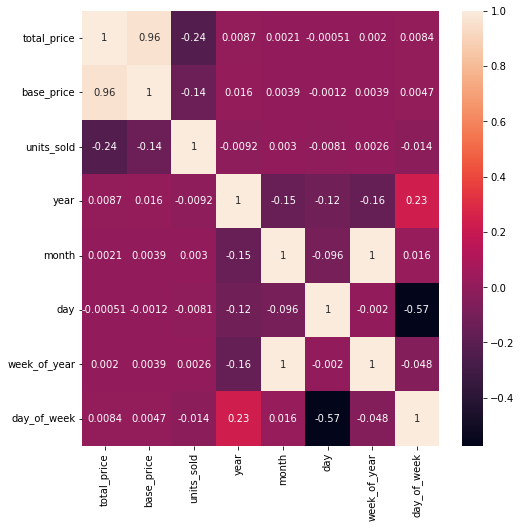

In [67]:
plt.figure(figsize=(8,8))
sns.heatmap(num_ft.corr(),annot=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_price', ylabel='Density'>

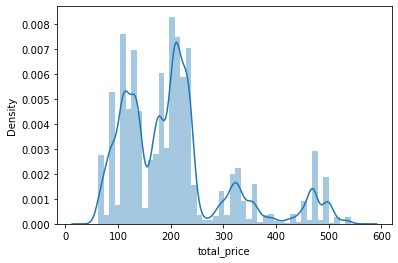

In [63]:
sns.distplot(num_ft['total_price'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='units_sold', ylabel='Density'>

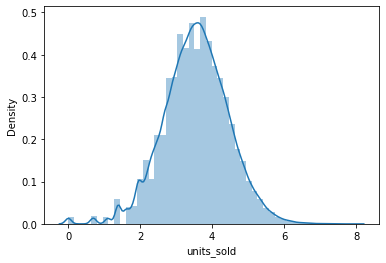

In [65]:
sns.distplot(np.log(num_ft['units_sold']))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='base_price', ylabel='Density'>

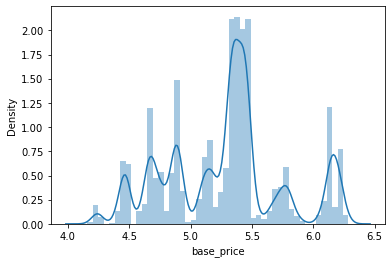

In [69]:
sns.distplot(train['base_price'])

In [68]:
train['base_price']=np.log(train['base_price'])
train['units_sold']=np.log(train['units_sold'])

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         150150 non-null  int64  
 1   sku_id           150150 non-null  int64  
 2   total_price      150150 non-null  float64
 3   base_price       150150 non-null  float64
 4   is_featured_sku  150150 non-null  int64  
 5   is_display_sku   150150 non-null  int64  
 6   units_sold       150150 non-null  float64
 7   year             150150 non-null  int64  
 8   month            150150 non-null  int64  
 9   day              150150 non-null  int64  
 10  week_of_year     150150 non-null  int64  
 11  day_of_week      150150 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 13.7 MB


In [75]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import accuracy_score as a_s

In [78]:
x = train.drop('units_sold',axis=1)
y = train['units_sold']

In [80]:
x.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,year,month,day,week_of_year,day_of_week
0,8091,216418,99.0375,4.717270,0,0,2011,1,17,3,0
1,8091,216419,99.0375,4.595499,0,0,2011,1,17,3,0
2,8091,216425,133.9500,4.897467,0,0,2011,1,17,3,0
3,8091,216233,133.9500,4.897467,0,0,2011,1,17,3,0
4,8091,217390,141.0750,4.949292,0,0,2011,1,17,3,0


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [82]:
x_train.shape,y_train.shape

((105105, 11), (105105,))

In [88]:
x_test.shape

(45045, 11)

In [83]:
model = lr()
model.fit(x_train,y_train)

LinearRegression()

In [90]:
pred_train = model.predict(x_train)
train_rmse = 100*(np.sqrt(msle(y_train,pred_train)))
pred_test = model.predict(x_test)
test_rmse = 100*(np.sqrt(msle(y_test,pred_test)))
print('Root mean square log error is ',train_rmse)
print('Root mean square log error is ',test_rmse)

Root mean square log error is  18.863759670334094
Root mean square log error is  18.65763505050186


In [95]:
prediction = model.predict(test)
prediction

array([ 76.18454154,  76.67918396,  93.99175066, ..., 280.93232565,
       133.02435937, 162.3324603 ])

In [96]:
test['prediction_sales_price']= prediction

In [97]:
test.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,year,month,day,week_of_year,day_of_week,prediction_sales_price
0,8091,216418,108.3000,108.3000,0,0,2013,7,16,29,1,76.184542
1,8091,216419,109.0125,109.0125,0,0,2013,7,16,29,1,76.679184
2,8091,216425,133.9500,133.9500,0,0,2013,7,16,29,1,93.991751
3,8091,216233,133.9500,133.9500,0,0,2013,7,16,29,1,93.992293
4,8091,217390,176.7000,176.7000,0,0,2013,7,16,29,1,123.667737
